In [1]:
import pandas as pd
import talib
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
price_df = pd.read_csv('../src/data/yfinance_data/AAPL_historical_data.csv')

In [3]:
# See the first few rows
print(price_df.head())

# Check for missing values
print(price_df.isnull().sum())

price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df.set_index('Date', inplace=True)

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [4]:
# Calculate 20-day Simple Moving Average
price_df['SMA_20'] = talib.SMA(price_df['Close'], timeperiod=20)

# Calculate 50-day Simple Moving Average
price_df['SMA_50'] = talib.SMA(price_df['Close'], timeperiod=50)

# Calculate RSI with 14-day period
price_df['RSI_14'] = talib.RSI(price_df['Close'], timeperiod=14)

# Calculate MACD (with default parameters)
price_df['MACD'], price_df['MACD_signal'],price_df['MACD_hist'] = talib.MACD(price_df['Close'])

# Preview updated dataframe
print(price_df[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_signal']].tail())

                 Close      SMA_20      SMA_50     RSI_14      MACD  \
Date                                                                  
2024-07-24  218.539993  224.228500  208.474199  48.687742  4.662717   
2024-07-25  217.490005  224.440500  209.098399  47.386437  3.748082   
2024-07-26  217.960007  224.633500  209.709000  48.055700  3.026267   
2024-07-29  218.240005  225.014500  210.279400  48.476184  2.448591   
2024-07-30  218.800003  225.117001  210.858600  49.359115  2.012764   

            MACD_signal  
Date                     
2024-07-24     6.678882  
2024-07-25     6.092722  
2024-07-26     5.479431  
2024-07-29     4.873263  
2024-07-30     4.301163  


Visualizations

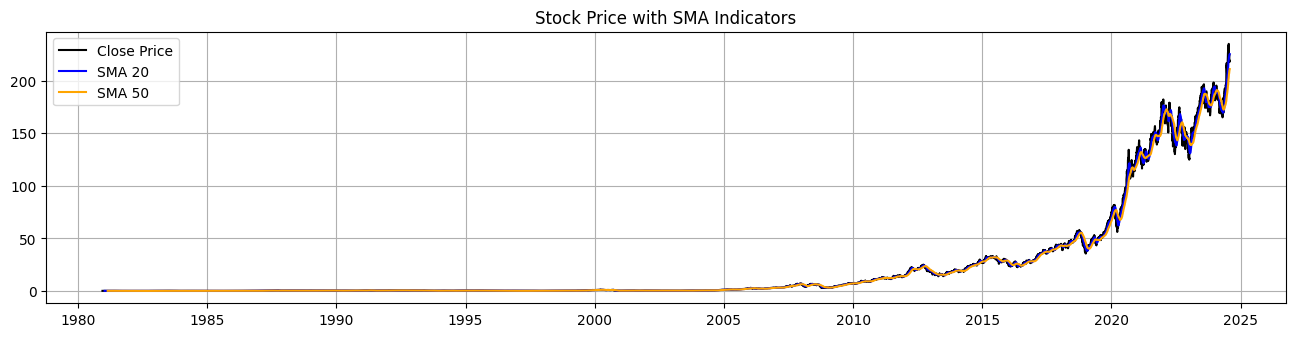

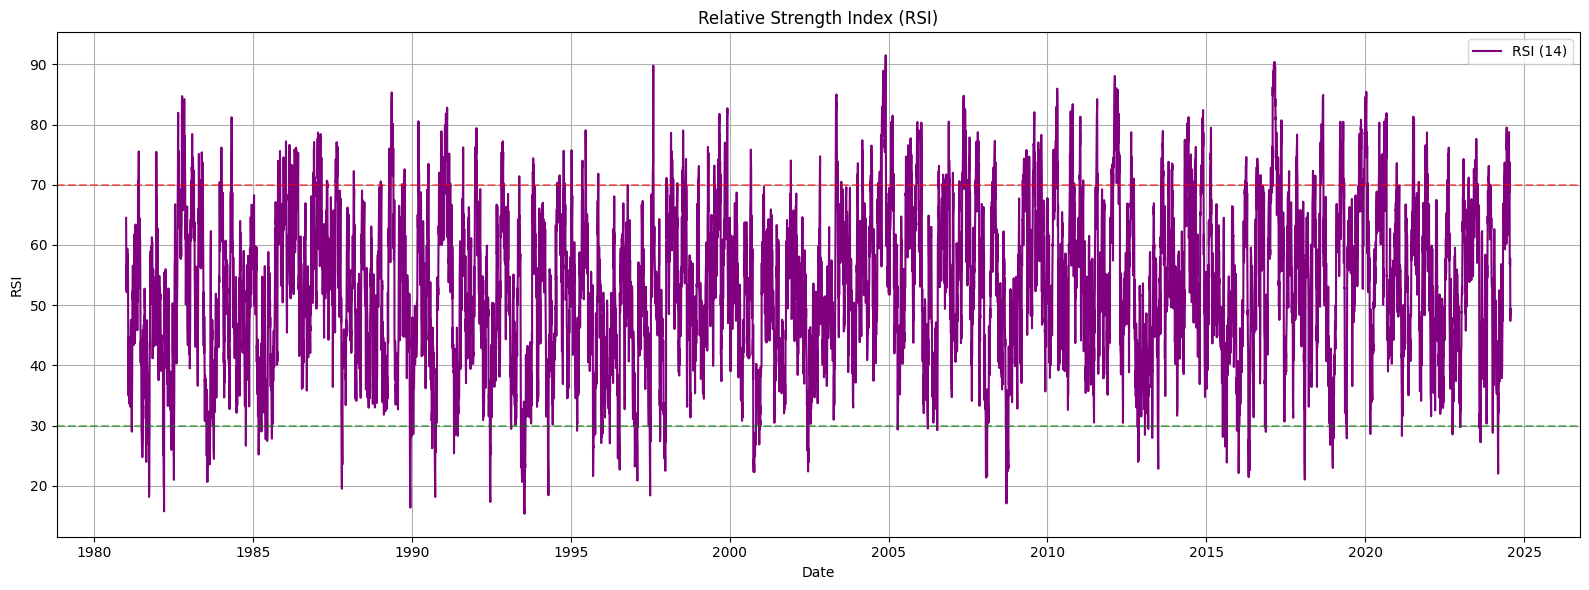

In [9]:
# Ensure datetime index (if not already)
price_df.index = pd.to_datetime(price_df.index)

plt.figure(figsize=(16, 12))

# ----- PRICE + SMA -----
plt.subplot(3, 1, 1)
plt.plot(price_df['Close'], label='Close Price', color='black')
plt.plot(price_df['SMA_20'], label='SMA 20', color='blue')
plt.plot(price_df['SMA_50'], label='SMA 50', color='orange')
plt.title('Stock Price with SMA Indicators')
plt.legend()
plt.grid(True)

plt.figure(figsize=(16, 6))  # Adjusted for RSI plot

# ----- RSI -----
plt.plot(price_df['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, linestyle='--', color='red', alpha=0.5)
plt.axhline(30, linestyle='--', color='green', alpha=0.5)
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)

# Save the RSI plot only
plt.tight_layout()
plt.savefig("../images/quantitative/apple/rsi_14_plot.png", dpi=300)  # Adjust the path as needed

# Show (optional)
plt.show()



In [ ]:
# --- Candlestick + SMA ---
fig_price = go.Figure()

# Candlestick
fig_price.add_trace(go.Candlestick(
    x=price_df.index,
    open=price_df['Open'],
    high=price_df['High'],
    low=price_df['Low'],
    close=price_df['Close'],
    name='OHLC'
))

# SMA 50
fig_price.add_trace(go.Scatter(
    x=price_df.index,
    y=price_df['SMA_50'],
    mode='lines',
    name='SMA 50',
    line=dict(color='red')
))

fig_price.update_layout(
    title='Apple Stock Price with SMA 50',
    yaxis_title='Price',
    xaxis_title='Date',
    template='plotly_white',
    height=500,
    xaxis_rangeslider_visible=False
)
# Save the figure as a PNG file
fig_price.write_image("../images/quantitative/apple/apple_stock_price_sma50.png", width=1000, height=500, scale=2)

fig_price.show()

In [ ]:
# --- Volume Chart ---
fig_volume = go.Figure()

fig_volume.add_trace(go.Bar(
    x=price_df.index,
    y=price_df['Volume'],
    name='Volume',
    marker_color='lightgray'
))

fig_volume.update_layout(
    title='Trading Volume',
    yaxis_title='Volume',
    xaxis_title='Date',
    template='plotly_white',
    height=300
)

fig_volume.show()